<a href="https://colab.research.google.com/github/Ivy1093367/Boyandgirl_predict/blob/main/v1.1_0331_An.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 環境設定&資料集匯入**

In [1958]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [1959]:
import pandas as pd
corpus_root = 'drive/My Drive/Colab Notebooks/datasets/'

In [1960]:
train_df = pd.read_csv(corpus_root+'boygirltrain.csv')
test_df = pd.read_csv(corpus_root+'boygirltest.csv')

In [1961]:
train_df

,id,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
0,1,2,處女座,Apple,154.0,43.0,NaN,NaN,583.0,0,Beautiful
1,2,2,處女座,Apple,156.0,47.0,NaN,130.0,NaN,3.5,Enjoying being who I'm notsss
2,3,1,射手座,NaN,170.0,61.0,NaN,90.0,540.0,NaN,Practice Makes perfect
3,4,1,射手座,Apple,170.0,62.0,4.0,100.0,NaN,5,Straightforward
4,5,2,射手座,Android,158.0,67.0,NaN,128.0,320.0,1.2,Humorous
...,...,...,...,...,...,...,...,...,...,...,...
418,419,1,處女座,Android,166.0,66.0,4.0,90.0,1000.0,1,I hope i am a super hero.
419,420,1,牡羊座,Android,176.0,65.0,4.0,87.0,1300.0,2,NaN
420,421,1,NaN,Apple,174.0,72.0,2.0,NaN,2000.0,9,NaN
421,422,2,天蠍座,NaN,167.0,50.0,3.0,180.0,483.0,10,NaN


In [1962]:
test_df

,id,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
0,1,0,天蠍座,Apple,200.0,100.0,1.0,87.0,87.0,87.0,GOod
1,2,0,金牛座,Apple,175.0,80.0,3.0,NaN,2000.0,NaN,Easygoing
2,3,0,雙子座,Apple,155.0,45.0,3.0,150.0,NaN,9.0,NaN
3,4,0,處女座,Apple,173.0,85.0,4.0,NaN,NaN,15.0,NaN
4,5,0,射手座,Android,164.0,57.0,4.0,130.0,505.0,2.0,I'm smart
...,...,...,...,...,...,...,...,...,...,...,...
421,422,0,金牛座,Apple,160.0,70.0,4.0,NaN,500.0,5.0,I am a girl.
422,423,0,天蠍座,Android,162.0,54.0,3.0,180.0,462.0,5.0,NaN
423,424,0,天蠍座,Apple,173.0,66.0,NaN,135.0,102.0,11.1,I like to play basketball.
424,425,0,NaN,NaN,165.0,53.0,NaN,110.0,507.0,416.0,Good


In [1963]:
train_df.isnull().sum()

,0
id,0
gender,0
star_sign,86
phone_os,78
height,74
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,90


# **2.資料前處理**






<h2>2.1 缺失比例查看

In [1964]:
def check_missing_proportions(df, name="Data"):
    print(f"\n {name} 缺失比例：")
    missing_ratio = df.isnull().mean()  # 每個變數的缺失比例
    overall_missing_ratio = df.isnull().mean().mean()  # 整體缺失比例
    print(missing_ratio)
    print(f"\n整體缺失比例: {overall_missing_ratio:.2%}")

check_missing_proportions(train_df, "訓練集")
check_missing_proportions(test_df, "測試集")


 訓練集 缺失比例：
id            0.000000
gender        0.000000
star_sign     0.203310
phone_os      0.184397
height        0.174941
weight        0.200946
sleepiness    0.215130
iq            0.186761
fb_friends    0.182033
yt            0.212766
self_intro    0.245863
dtype: float64

整體缺失比例: 16.42%

 測試集 缺失比例：
id            0.000000
gender        0.000000
star_sign     0.190141
phone_os      0.225352
height        0.159624
weight        0.225352
sleepiness    0.169014
iq            0.215962
fb_friends    0.206573
yt            0.183099
self_intro    0.218310
dtype: float64

整體缺失比例: 16.30%


<h2>2.2 刪除欄位

In [1965]:
id_train_backup = train_df['id'].copy()
id_test_backup = test_df['id'].copy()

train_df.drop(columns=["star_sign"], inplace=True)
test_df.drop(columns=["star_sign"], inplace=True)

train_df.drop(columns=["id"], inplace=True)
test_df.drop(columns=["id"], inplace=True)
# 備份 self_intro
self_train_backup = train_df['self_intro'].copy()
self_test_backup = test_df['self_intro'].copy()
# 然後從 df 中暫時移除
train_df = train_df.drop(columns=['self_intro'])
test_df = test_df.drop(columns=['self_intro'])

<h2>2.3 處理特殊值



In [1966]:
cat_cols = ["phone_os", "sleepiness"]

In [1967]:
import numpy as np
missing_values = ['', 'N/A', 'missing', '#NUM!']

# 將非標準缺失值轉為 NaN
train_df = train_df.replace(missing_values, np.nan)

train_df['yt'] = pd.to_numeric(train_df['yt'], errors='coerce')  # 非法值轉成 NaN
test_df['yt'] = pd.to_numeric(test_df['yt'], errors='coerce')  # 非法值轉成 NaN

In [1968]:
train_df.isnull().sum()

,0
gender,0
phone_os,78
height,74
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,91


In [1969]:
print(train_df['phone_os'].unique())

['Apple' nan 'Android' 'Windows Phone' 'JohnCena']


In [1970]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 合法的手機作業系統
valid_os = ['Apple', 'Android']

# 預處理函數：清除空白、標準化格式，保留 NaN
def clean_phone_os(df):
    df['phone_os'] = df['phone_os'].apply(
        lambda x: x.strip() if isinstance(x, str) else x  # 保留 NaN
    )
    df['phone_os'] = df['phone_os'].apply(
        lambda x: x if (x in valid_os) else ('other' if pd.notna(x) else np.nan)  # NaN 繼續 NaN
    )
    return df

# 套用預處理
train_df = clean_phone_os(train_df)
test_df = clean_phone_os(test_df)

# 建立並訓練 LabelEncoder，忽略 NaN
le = LabelEncoder()
le.fit(train_df['phone_os'].dropna())  # 不把 NaN 當作一個類別

# 類別對應表
class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("類別對應：", class_mapping)

# Label Encoding，NaN 保持 NaN
train_df['phone_os'] = train_df['phone_os'].apply(lambda x: le.transform([x])[0] if pd.notna(x) else np.nan)
test_df['phone_os'] = test_df['phone_os'].apply(lambda x: le.transform([x])[0] if pd.notna(x) else np.nan)

# 驗證結果
print("train_df['phone_os'] dtype：", train_df['phone_os'].dtype)
print("train_df['phone_os'] 前幾筆：\n", train_df['phone_os'].head())

類別對應： {'Android': np.int64(0), 'Apple': np.int64(1), 'other': np.int64(2)}
train_df['phone_os'] dtype： float64
train_df['phone_os'] 前幾筆：
 0    1.0
1    1.0
2    NaN
3    1.0
4    0.0
Name: phone_os, dtype: float64


In [1971]:
train_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt
0,2,1.0,154.0,43.0,NaN,NaN,583.0,0.0
1,2,1.0,156.0,47.0,NaN,130.0,NaN,3.5
2,1,NaN,170.0,61.0,NaN,90.0,540.0,NaN
3,1,1.0,170.0,62.0,4.0,100.0,NaN,5.0
4,2,0.0,158.0,67.0,NaN,128.0,320.0,1.2
...,...,...,...,...,...,...,...,...
418,1,0.0,166.0,66.0,4.0,90.0,1000.0,1.0
419,1,0.0,176.0,65.0,4.0,87.0,1300.0,2.0
420,1,1.0,174.0,72.0,2.0,NaN,2000.0,9.0
421,2,NaN,167.0,50.0,3.0,180.0,483.0,10.0


In [1972]:
test_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt
0,0,1.0,200.0,100.0,1.0,87.0,87.0,87.0
1,0,1.0,175.0,80.0,3.0,NaN,2000.0,NaN
2,0,1.0,155.0,45.0,3.0,150.0,NaN,9.0
3,0,1.0,173.0,85.0,4.0,NaN,NaN,15.0
4,0,0.0,164.0,57.0,4.0,130.0,505.0,2.0
...,...,...,...,...,...,...,...,...
421,0,1.0,160.0,70.0,4.0,NaN,500.0,5.0
422,0,0.0,162.0,54.0,3.0,180.0,462.0,5.0
423,0,1.0,173.0,66.0,NaN,135.0,102.0,11.1
424,0,NaN,165.0,53.0,NaN,110.0,507.0,416.0


In [1973]:
# 印出 gender 的唯一值
print(train_df['gender'].unique())

[2 1]


<Axes: >

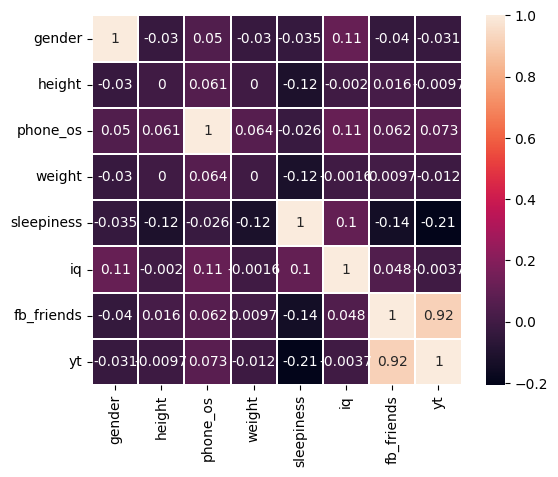

In [1974]:
import seaborn as sns
sns.heatmap(train_df[['gender', 'height', 'phone_os', 'weight', 'sleepiness', 'iq', 'fb_friends', 'yt']].corr(),linewidths=0.1,vmax=1.0, square=True,linecolor='white', annot=True)

<h2>2.4 檢查fb的資料分布

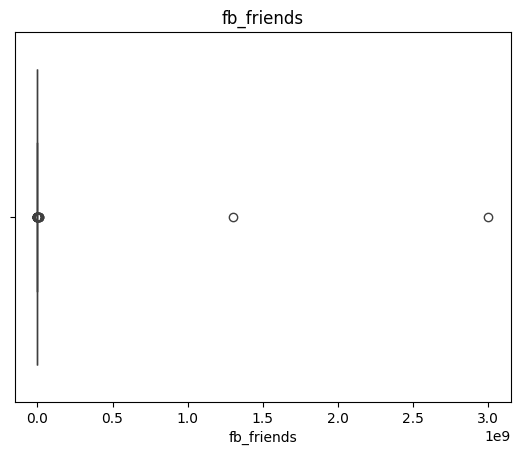

In [1975]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['fb_friends'])
plt.title("fb_friends")
plt.show()

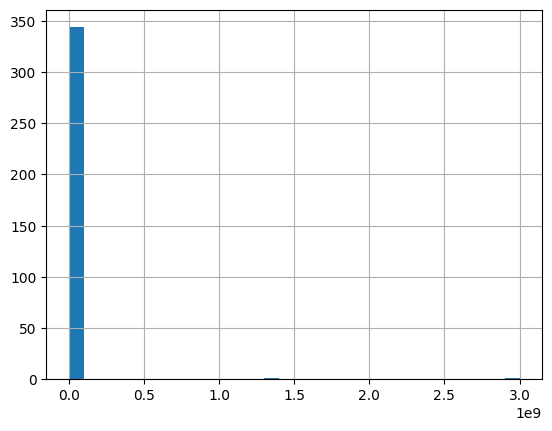

In [1976]:
train_df['fb_friends'].hist(bins=30)
plt.show()

In [1977]:
#清理 fb_friends 欄位的異常值
train_df.loc[train_df['fb_friends'] < 0, 'fb_friends'] *= -1
test_df.loc[test_df['fb_friends'] < 0, 'fb_friends'] *= -1

In [1978]:
# 壓縮 > 5,000的資料
def process_fb_friends_mobile_traffic(df, upper_limit=3000):
    df = df.copy()
    df['is_outlier_fb_friends'] = df['fb_friends'] >= upper_limit
    df['fb_friends'] = df['fb_friends'].clip(upper=upper_limit)
    return df

train_df = process_fb_friends_mobile_traffic(train_df)
test_df = process_fb_friends_mobile_traffic(test_df)

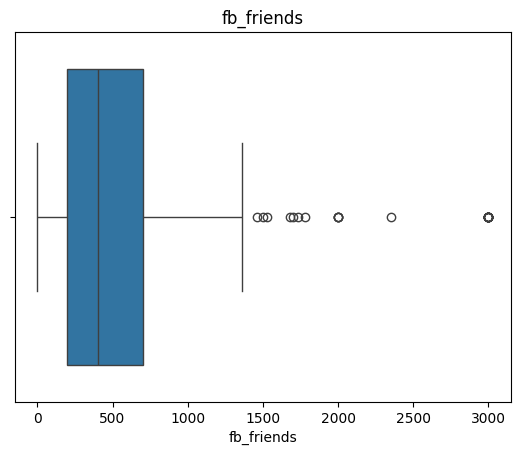

In [1979]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.boxplot(x=train_df['fb_friends'])
plt.title("fb_friends")
plt.show()

In [1980]:
train_df.isnull().sum()

,0
gender,0
phone_os,78
height,74
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,91
is_outlier_fb_friends,0


<h2>2.5 檢查yt資料分布

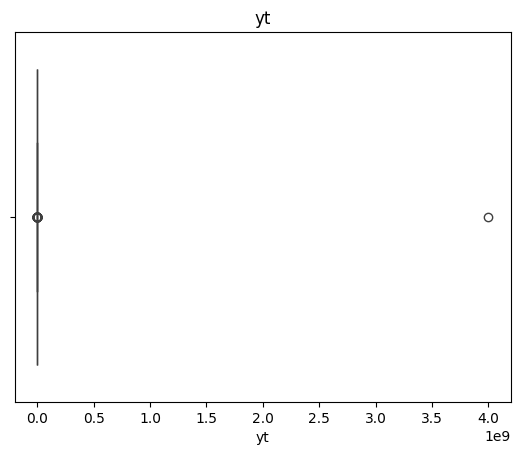

In [1981]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['yt'])
plt.title("yt")
plt.show()

In [1982]:
# 清理 yt 欄位的異常值
train_df.loc[train_df['yt'] < 0, 'yt'] *= -1
test_df.loc[test_df['yt'] < 0, 'yt'] *= -1

In [1983]:
# 做clip 處理資料差距
def process_yt_mobile_traffic(df, upper_limit=120):
    df = df.copy()
    df['is_outlier_yt'] = df['yt'] >= upper_limit
    df['yt'] = df['yt'].clip(upper=upper_limit)
    return df

train_df = process_yt_mobile_traffic(train_df)
test_df = process_yt_mobile_traffic(test_df)

In [1984]:
train_df.isnull().sum()

,0
gender,0
phone_os,78
height,74
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,91
is_outlier_fb_friends,0
is_outlier_yt,0


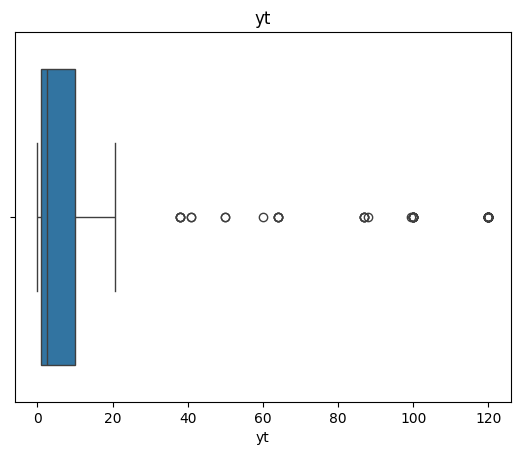

In [1985]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['yt'])
plt.title("yt")
plt.show()

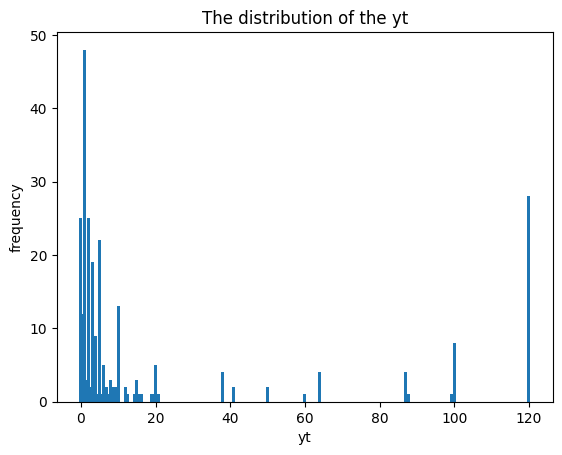

In [1986]:
sleepiness_values = train_df['yt'].unique()

# 計算每個年齡值的出現次數 (即統計 `sleepiness` 欄位的頻率)
value_counts = train_df['yt'].value_counts()

# 重新索引 `value_counts`，確保所有 `unique_values` 都包含在內，缺少的值填入 0
value_counts = value_counts.reindex(sleepiness_values, fill_value = 0)

# 使用 Matplotlib 繪製長條圖 (Bar Chart)
plt.bar(sleepiness_values, value_counts)
plt.xlabel('yt')  # 設定 X 軸標籤 (年齡數值)
plt.ylabel('frequency')  # 設定 Y 軸標籤 (年齡出現的次數)
plt.title('The distribution of the yt')
plt.show()

<h2>2.6檢查height分布




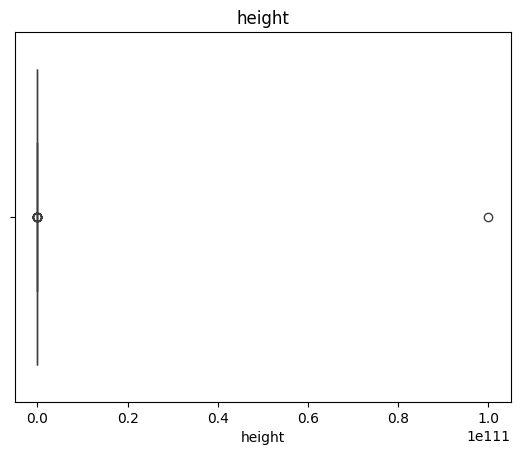

In [1987]:
sns.boxplot(x=train_df['height'])
plt.title("height")
plt.show()

In [1988]:
train_df.loc[train_df['height'] < 130, 'height'] = 140
test_df.loc[test_df['height'] < 130, 'height'] = 140

In [1989]:
def process_height_mobile_traffic(df, upper_limit=200):
    df = df.copy()
    df['is_outlier_height'] = df['height'] >= upper_limit
    df['height'] = df['height'].clip(upper=upper_limit)
    return df

train_df = process_height_mobile_traffic(train_df)
test_df = process_height_mobile_traffic(test_df)

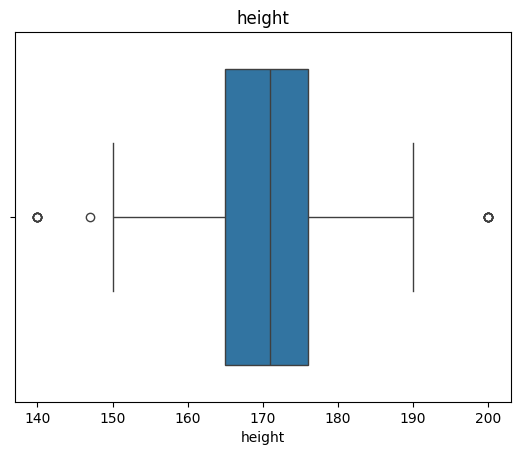

In [1990]:
sns.boxplot(x=train_df['height'])
plt.title("height")
plt.show()

In [1991]:
train_df.isnull().sum()

,0
gender,0
phone_os,78
height,74
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,91
is_outlier_fb_friends,0
is_outlier_yt,0


<h2>2.7檢查weight分布

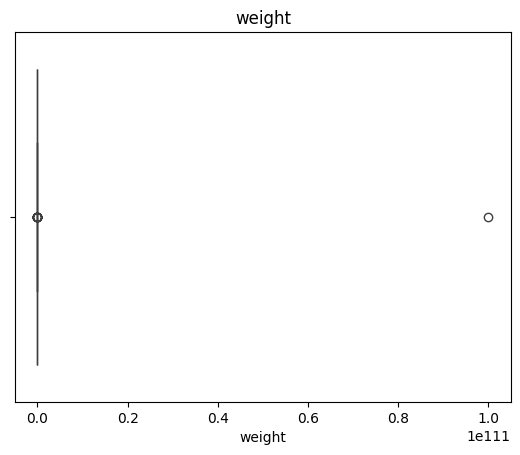

In [1992]:
sns.boxplot(x=train_df['weight'])
plt.title("weight")
plt.show()

In [1993]:
train_df.loc[(train_df['weight'] < 30), 'weight'] = 40
test_df.loc[(test_df['weight'] < 30), 'weight'] = 40

In [1994]:
def process_weight_mobile_traffic(df, upper_limit=130):
    df = df.copy()
    df['is_outlier_weight'] = df['weight'] >= upper_limit
    df['weight'] = df['weight'].clip(upper=upper_limit)
    return df

train_df = process_weight_mobile_traffic(train_df)
test_df = process_weight_mobile_traffic(test_df)

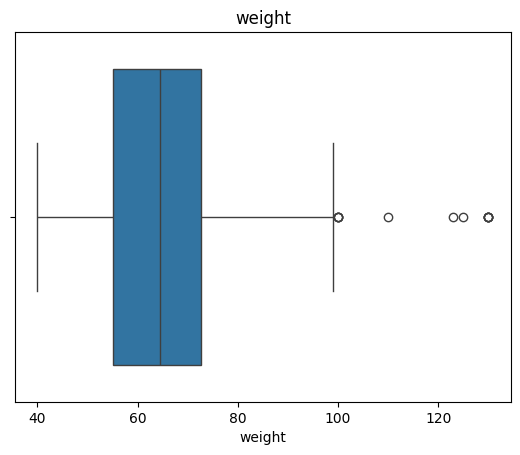

In [1995]:
sns.boxplot(x=train_df['weight'])
plt.title("weight")
plt.show()

In [1996]:
train_df.isnull().sum()

,0
gender,0
phone_os,78
height,74
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,91
is_outlier_fb_friends,0
is_outlier_yt,0


<h2>2.8檢查IQ分布

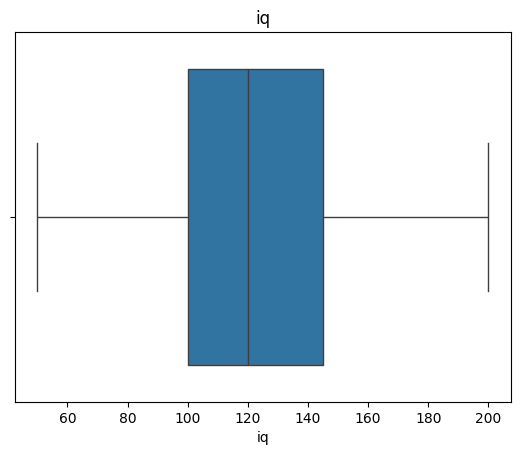

In [1997]:
sns.boxplot(x=train_df['iq'])
plt.title("iq")
plt.show()

<h2>2.9檢查sleepiness分布

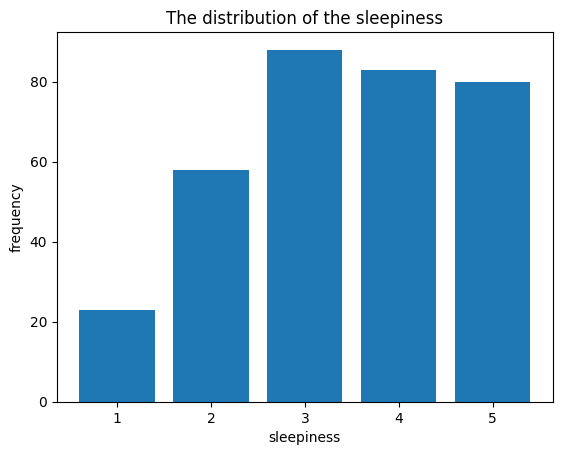

In [1998]:
sleepiness_values = train_df['sleepiness'].unique()

# 計算每個年齡值的出現次數 (即統計 `sleepiness` 欄位的頻率)
value_counts = train_df['sleepiness'].value_counts()

# 重新索引 `value_counts`，確保所有 `unique_values` 都包含在內，缺少的值填入 0
value_counts = value_counts.reindex(sleepiness_values, fill_value = 0)

# 使用 Matplotlib 繪製長條圖 (Bar Chart)
plt.bar(sleepiness_values, value_counts)
plt.xlabel('sleepiness')  # 設定 X 軸標籤 (年齡數值)
plt.ylabel('frequency')  # 設定 Y 軸標籤 (年齡出現的次數)
plt.title('The distribution of the sleepiness')
plt.show()

<h2>2.10 標記train離群值欄位

In [1999]:
def mark_outliers_iqr(df, columns, k=1.5):
    df_marked = df.copy()

    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - k * IQR
            upper = Q3 + k * IQR

            df_marked[f'is_outlier_{col}'] = ~df[col].between(lower, upper)
            outlier_count = df_marked[f'is_outlier_{col}'].sum()
            print(f" {col}: 已標記 {outlier_count} 筆離群值（不在 [{round(lower,2)}, {round(upper,2)}] 內）")

    return df_marked


In [2000]:
# 要標記的欄位
target_columns = ['height', 'weight', 'iq', 'fb_friends', 'yt']

# 執行標記
train_df = mark_outliers_iqr(train_df, columns=target_columns)

 height: 已標記 88 筆離群值（不在 [148.5, 192.5] 內）
 weight: 已標記 97 筆離群值（不在 [28.38, 99.38] 內）
 iq: 已標記 79 筆離群值（不在 [32.5, 212.5] 內）
 fb_friends: 已標記 105 筆離群值（不在 [-550.0, 1450.0] 內）
 yt: 已標記 146 筆離群值（不在 [-12.5, 23.5] 內）


<h2>2.11 標記test離群值

In [2001]:
def mark_outliers_by_reference(df_target, df_reference, columns, k=1.5):
    df_marked = df_target.copy()

    for col in columns:
        if pd.api.types.is_numeric_dtype(df_reference[col]):
            Q1 = df_reference[col].quantile(0.25)
            Q3 = df_reference[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - k * IQR
            upper = Q3 + k * IQR

            df_marked[f'is_outlier_{col}'] = ~df_target[col].between(lower, upper)
            outlier_count = df_marked[f'is_outlier_{col}'].sum()
            print(f"【{col}】在 test 中標記 {outlier_count} 筆離群值（不在 [{round(lower,2)}, {round(upper,2)}] 內）")

    return df_marked


In [2002]:
test_df = mark_outliers_by_reference(test_df, train_df, columns=target_columns)

【height】在 test 中標記 82 筆離群值（不在 [148.5, 192.5] 內）
【weight】在 test 中標記 105 筆離群值（不在 [28.38, 99.38] 內）
【iq】在 test 中標記 92 筆離群值（不在 [32.5, 212.5] 內）
【fb_friends】在 test 中標記 105 筆離群值（不在 [-550.0, 1450.0] 內）
【yt】在 test 中標記 200 筆離群值（不在 [-12.5, 23.5] 內）


In [2003]:
# 假設你用 train_df 的欄位順序當標準
column_order = train_df.columns.tolist()

# 讓 test_df 排成一樣的欄位順序
test_df = test_df.loc[:, column_order]

In [2004]:
# 自動抓出含有 'is_outlier' 的欄位
outlier_cols = [col for col in train_df.columns if 'is_outlier' in col]

# 對這些欄位做 label encoding（其實 bool 直接轉 int 就行）
for col in outlier_cols:
    train_df[col] = train_df[col].astype(int)
    test_df[col] = test_df[col].astype(int)

# **3. 分區填補缺失值**

In [2005]:
test_df['gender'] = np.nan

# 3.1資料分布

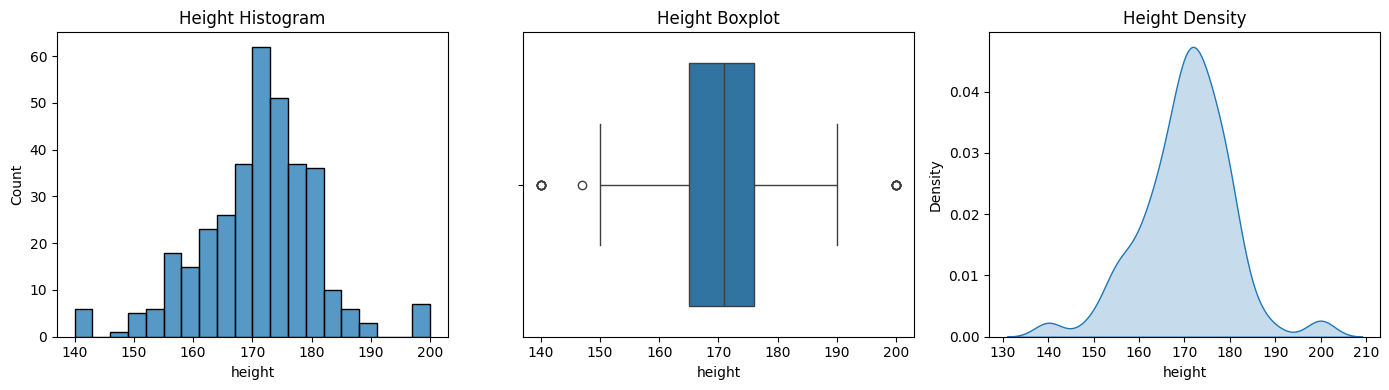

In [2006]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,4))

# Histogram
plt.subplot(1,3,1)
sns.histplot(train_df['height'], bins=20, kde=False)
plt.title('Height Histogram')

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=train_df['height'])
plt.title('Height Boxplot')

# Density plot
plt.subplot(1,3,3)
sns.kdeplot(train_df['height'], fill=True)
plt.title('Height Density')

plt.tight_layout()
plt.show()


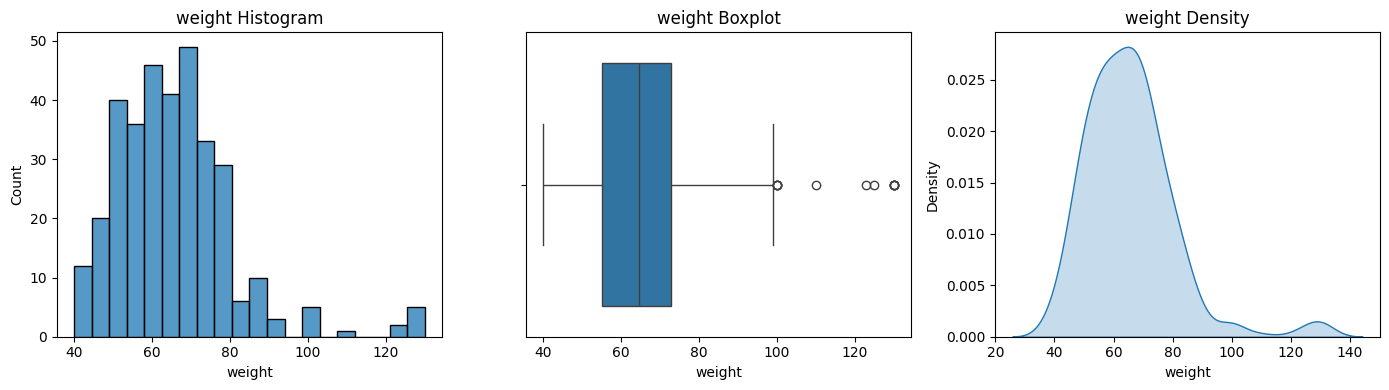

In [2007]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,4))

# Histogram
plt.subplot(1,3,1)
sns.histplot(train_df['weight'], bins=20, kde=False)
plt.title('weight Histogram')

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=train_df['weight'])
plt.title('weight Boxplot')

# Density plot
plt.subplot(1,3,3)
sns.kdeplot(train_df['weight'], fill=True)
plt.title('weight Density')

plt.tight_layout()
plt.show()


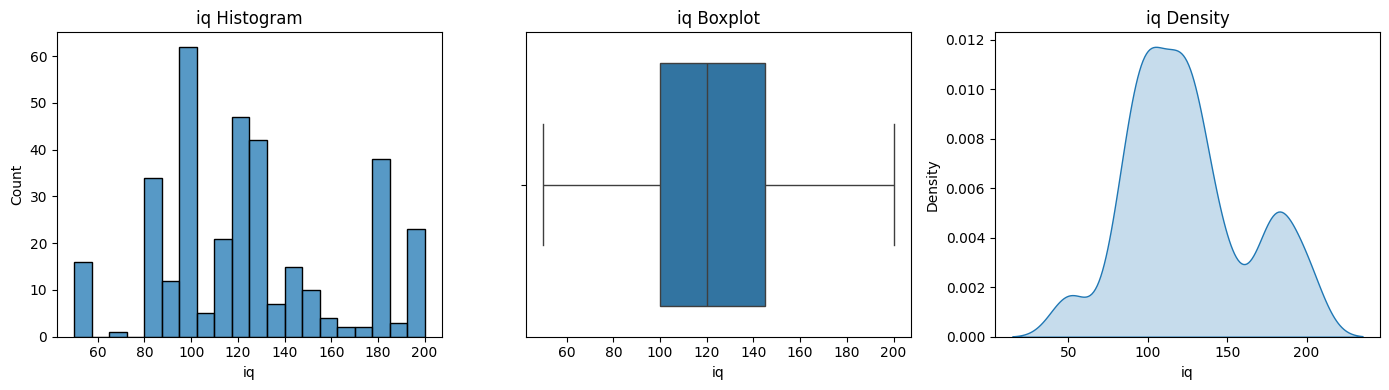

In [2008]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,4))

# Histogram
plt.subplot(1,3,1)
sns.histplot(train_df['iq'], bins=20, kde=False)
plt.title('iq Histogram')

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=train_df['iq'])
plt.title('iq Boxplot')

# Density plot
plt.subplot(1,3,3)
sns.kdeplot(train_df['iq'], fill=True)
plt.title('iq Density')

plt.tight_layout()
plt.show()


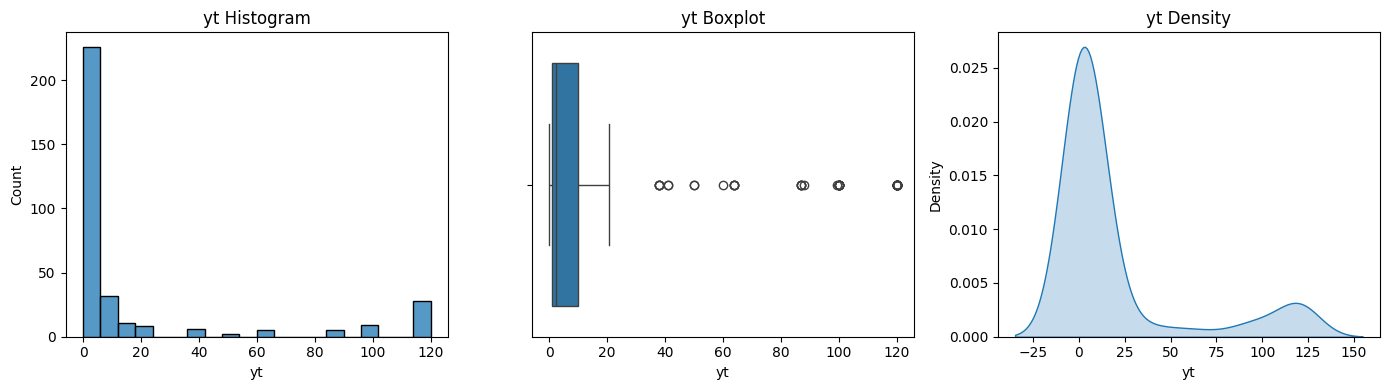

In [2009]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,4))

# Histogram
plt.subplot(1,3,1)
sns.histplot(train_df['yt'], bins=20, kde=False)
plt.title('yt Histogram')

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=train_df['yt'])
plt.title('yt Boxplot')

# Density plot
plt.subplot(1,3,3)
sns.kdeplot(train_df['yt'], fill=True)
plt.title('yt Density')

plt.tight_layout()
plt.show()


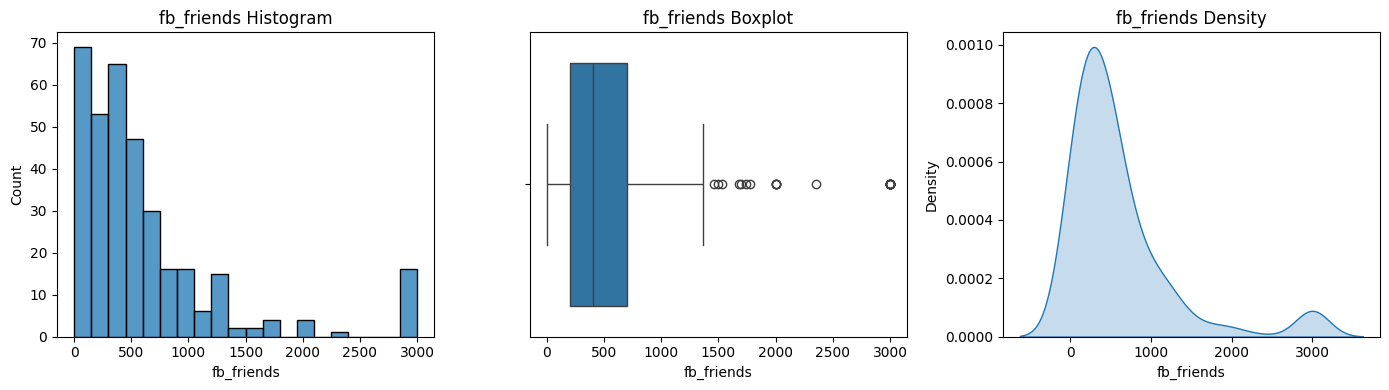

In [2010]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,4))

# Histogram
plt.subplot(1,3,1)
sns.histplot(train_df['fb_friends'], bins=20, kde=False)
plt.title('fb_friends Histogram')

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=train_df['fb_friends'])
plt.title('fb_friends Boxplot')

# Density plot
plt.subplot(1,3,3)
sns.kdeplot(train_df['fb_friends'], fill=True)
plt.title('fb_friends Density')

plt.tight_layout()
plt.show()

# height分割區域

In [1936]:
bins = [0, 160, 175, 999]  # 999 是最大值保險用
labels = ['short', 'medium', 'tall']
train_df['height_group'] = pd.cut(train_df['height'], bins=bins, labels=labels)

# height與其他特徵關聯

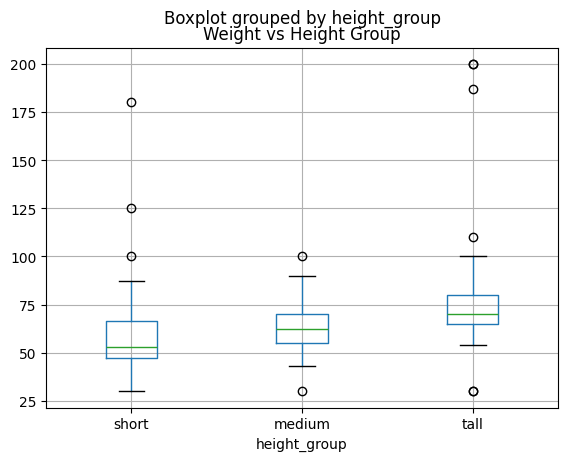

<ipython-input-1937-22d0699ed828>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby('height_group')['weight'].describe()


,count,mean,std,min,25%,50%,75%,max
height_group,,,,,,,,
short,42.0,60.523810,25.941997,30.0,47.0,53.0,66.25,180.0
medium,160.0,63.218750,10.347832,30.0,55.0,62.5,70.00,100.0
tall,77.0,75.909091,27.484532,30.0,65.0,70.0,80.00,200.0


In [1937]:
train_df.boxplot(column='weight', by='height_group')
plt.title('Weight vs Height Group')
plt.show()

train_df.groupby('height_group')['weight'].describe()

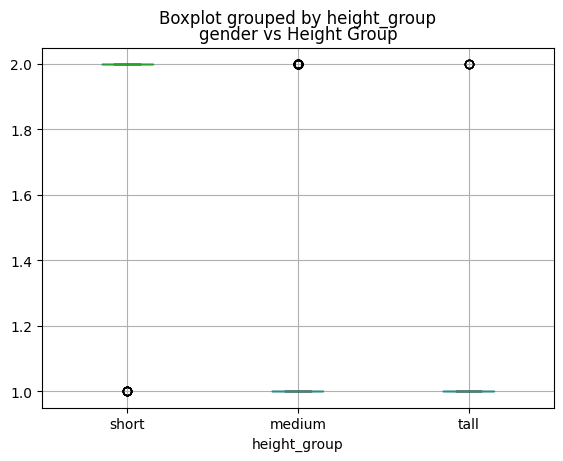

<ipython-input-1938-c60d1bee619f>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby('height_group')['gender'].describe()


,count,mean,std,min,25%,50%,75%,max
height_group,,,,,,,,
short,51.0,1.823529,0.385013,1.0,2.0,2.0,2.0,2.0
medium,199.0,1.190955,0.394045,1.0,1.0,1.0,1.0,2.0
tall,99.0,1.050505,0.220099,1.0,1.0,1.0,1.0,2.0


In [1938]:
train_df.boxplot(column='gender', by='height_group')
plt.title('gender vs Height Group')
plt.show()

train_df.groupby('height_group')['gender'].describe()

# **3. 缺失值處理**


In [2011]:
train_df.isnull().sum()

,0
gender,0
phone_os,78
height,74
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,91
is_outlier_fb_friends,0
is_outlier_yt,0


<Axes: >

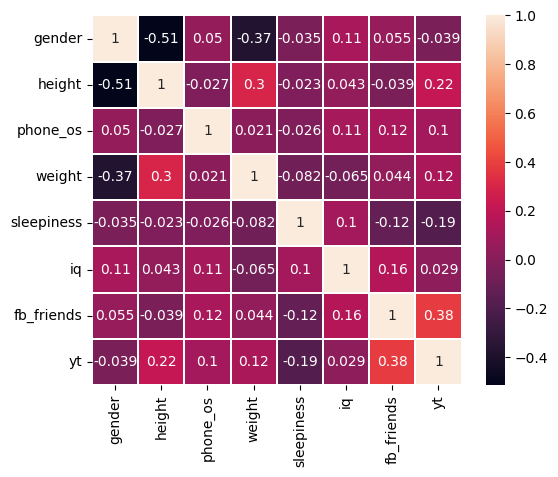

In [2012]:
# 數值欄位相關性
#負擔（負擔相關）：表示兩個變數的逆轉變化（例如性別增加，身高減少）。
#正數（正相關）：表示兩個變化數同向變化（例如身高增加，體重增加）。
sns.heatmap(train_df[['gender', 'height', 'phone_os', 'weight', 'sleepiness', 'iq', 'fb_friends', 'yt']].corr(),linewidths=0.1,vmax=1.0, square=True,linecolor='white', annot=True)

In [2013]:
print(test_df['gender'].unique())

[nan]


In [2014]:
test_df['gender'] = np.nan

# 3.1插補模型function

**DT+KNN**

In [2015]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer

def dt_impute_classifier(train_df, test_df, target_col, predictor_cols, model_params=None):
    train_df_copy = train_df.copy()
    test_df_copy = test_df.copy()

    # Step 1: KNN 補 predictors
    imputer = KNNImputer(n_neighbors=5)
    train_df_copy[predictor_cols] = imputer.fit_transform(train_df_copy[predictor_cols])
    test_df_copy[predictor_cols] = imputer.transform(test_df_copy[predictor_cols])

    # Step 2: train
    train_df_non_missing = train_df_copy[train_df_copy[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col].astype(int)

    if model_params is None:
        model_params = {'max_depth': 5, 'random_state': 42}
    model = DecisionTreeClassifier(**model_params)
    model.fit(X_train, y_train)

    # Step 3: impute train target
    train_df_missing = train_df[train_df[target_col].isnull()]
    if not train_df_missing.empty:
        X_train_missing = train_df_copy.loc[train_df_missing.index, predictor_cols]
        train_df.loc[train_df_missing.index, target_col] = model.predict(X_train_missing).astype(int)

    # Step 4: impute test target
    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df_copy.loc[test_df_missing.index, predictor_cols]
        test_df.loc[test_df_missing.index, target_col] = model.predict(X_test_missing).astype(int)

    # Step 5: 確保欄位型態 (重點)
    train_df[target_col] = train_df[target_col].astype(int)
    test_df[target_col] = test_df[target_col].astype(int)

    return train_df, test_df

**XG+KNN**

In [2016]:
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer

def xgboost_impute(train_df, test_df, target_col, predictor_cols, model_params=None):
    # Step 0: 建立 copy，不直接改原始 train_df 和 test_df
    train_df_copy = train_df.copy()
    test_df_copy = test_df.copy()

    # Step 1: KNN 只作用在 copy 上
    imputer = KNNImputer(n_neighbors=5)
    train_df_copy[predictor_cols] = imputer.fit_transform(train_df_copy[predictor_cols])
    test_df_copy[predictor_cols] = imputer.transform(test_df_copy[predictor_cols])

    # Step 2: 訓練資料處理（用 copy 做）
    train_df_non_missing = train_df_copy[train_df_copy[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col]

    # Step 3: 模型設定
    if model_params is None:
        model_params = {'random_state': 42, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
    model = XGBRegressor(**model_params)
    model.fit(X_train, y_train)

    # Step 4: 用 copy 去預測 target 缺失，不改 predictor
    train_df_missing = train_df[train_df[target_col].isnull()]
    if not train_df_missing.empty:
        X_train_missing = train_df_copy.loc[train_df_missing.index, predictor_cols]
        train_df.loc[train_df_missing.index, target_col] = model.predict(X_train_missing)

    # Step 5: test_df 的 target 缺失值預測
    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df_copy.loc[test_df_missing.index, predictor_cols]
        test_df.loc[test_df_missing.index, target_col] = model.predict(X_test_missing)

    return train_df, test_df


**RandomForest+KNN**

In [2017]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
import numpy as np

def rf_impute(train_df, test_df, target_col, predictor_cols, model_params=None):

    # Step 0: 建立 copy，不改原始的 train_df / test_df
    train_df_copy = train_df.copy()
    test_df_copy = test_df.copy()

    # Step 1: predictor 缺失值用 KNN 補值 (只用在 copy)
    imputer = KNNImputer(n_neighbors=5)
    train_df_copy[predictor_cols] = imputer.fit_transform(train_df_copy[predictor_cols])
    test_df_copy[predictor_cols] = imputer.transform(test_df_copy[predictor_cols])

    # Step 2: 訓練資料處理（用補過的 copy）
    train_df_non_missing = train_df_copy[train_df_copy[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col]

    # Step 3: 模型設定
    if model_params is None:
        model_params = {'n_estimators': 100, 'max_depth': 5, 'random_state': 42}
    model = RandomForestRegressor(**model_params)
    model.fit(X_train, y_train)

    # Step 4: 只預測 target 缺失，不動其他 predictor
    train_df_missing = train_df[train_df[target_col].isnull()]
    if not train_df_missing.empty:
        X_train_missing = train_df_copy.loc[train_df_missing.index, predictor_cols]
        train_df.loc[train_df_missing.index, target_col] = model.predict(X_train_missing)

    # Step 5: test_df 的 target 缺失值預測
    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df_copy.loc[test_df_missing.index, predictor_cols]
        test_df.loc[test_df_missing.index, target_col] = model.predict(X_test_missing)

    return train_df, test_df


**SVM+KNN**

In [2018]:
from sklearn.svm import SVR
from sklearn.impute import KNNImputer

def svm_impute(train_df, test_df, target_col, predictor_cols, model_params=None):

    # Step 0: 建立副本，避免直接改到原始 train_df / test_df
    train_df_copy = train_df.copy()
    test_df_copy = test_df.copy()

    # Step 1: KNN 只補在 copy 中
    imputer = KNNImputer(n_neighbors=5)
    train_df_copy[predictor_cols] = imputer.fit_transform(train_df_copy[predictor_cols])
    test_df_copy[predictor_cols] = imputer.transform(test_df_copy[predictor_cols])

    # Step 2: 訓練資料處理
    train_df_non_missing = train_df_copy[train_df_copy[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col]

    # Step 3: 模型設定
    if model_params is None:
        model_params = {'C': 1.0, 'epsilon': 0.1}
    model = SVR(**model_params)
    model.fit(X_train, y_train)

    # Step 4: 插補 train_df target
    train_df_missing = train_df[train_df[target_col].isnull()]
    if not train_df_missing.empty:
        X_train_missing = train_df_copy.loc[train_df_missing.index, predictor_cols]
        train_df.loc[train_df_missing.index, target_col] = model.predict(X_train_missing)

    # Step 5: 插補 test_df target
    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df_copy.loc[test_df_missing.index, predictor_cols]
        test_df.loc[X_test_missing.index, target_col] = model.predict(X_test_missing)

    return train_df, test_df


**KNN+KNN**

In [2019]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer

def knn_impute(train_df, test_df, target_col, predictor_cols, model_params=None):

    # Step 0: 建立 copy，避免改到原始 train_df / test_df
    train_df_copy = train_df.copy()
    test_df_copy = test_df.copy()

    # Step 1: KNNImputer 暫時補 predictor 缺失
    imputer = KNNImputer(n_neighbors=5)
    train_df_copy[predictor_cols] = imputer.fit_transform(train_df_copy[predictor_cols])
    test_df_copy[predictor_cols] = imputer.transform(test_df_copy[predictor_cols])

    # Step 2: 用補好的 copy 去訓練
    train_df_non_missing = train_df_copy[train_df_copy[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col]

    # Step 3: 模型設定
    if model_params is None:
        model_params = {'n_neighbors': 5}
    model = KNeighborsRegressor(**model_params)
    model.fit(X_train, y_train)

    # Step 4: 插補 train_df target
    train_df_missing = train_df[train_df[target_col].isnull()]
    if not train_df_missing.empty:
        X_train_missing = train_df_copy.loc[train_df_missing.index, predictor_cols]
        train_df.loc[train_df_missing.index, target_col] = model.predict(X_train_missing)

    # Step 5: 插補 test_df target
    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df_copy.loc[test_df_missing.index, predictor_cols]
        test_df.loc[X_test_missing.index, target_col] = model.predict(X_test_missing)

    return train_df, test_df


**MICE+KNN**

In [2020]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.tree import DecisionTreeRegressor


def impute_mice_train(train_df, target_col, predictor_cols, knn_params=None, mice_params=None):
    train_df = train_df.copy()

    if knn_params is None:
        knn_params = {'n_neighbors': 5}
    if mice_params is None:
        mice_params = {'estimator': DecisionTreeRegressor(max_depth=5, random_state=42),
                       'max_iter': 10, 'random_state': 42}

    # Step 1: KNN impute train predictors
    imputer_knn = KNNImputer(**knn_params)
    train_df[predictor_cols] = imputer_knn.fit_transform(train_df[predictor_cols])

    # Step 2: MICE impute train target
    imputer_mice = IterativeImputer(**mice_params)
    cols_for_mice = predictor_cols + [target_col]
    train_df[cols_for_mice] = imputer_mice.fit_transform(train_df[cols_for_mice])

    return train_df, imputer_knn, imputer_mice

def impute_mice_test(train_df, test_df, target_col, predictor_cols, imputer_knn, imputer_mice):
    train_df = train_df.copy()
    test_df = test_df.copy()

    # Step 1: KNN impute test predictors
    test_df[predictor_cols] = imputer_knn.transform(test_df[predictor_cols])

    # Step 2: 只保留 predictor_cols + target_col，不要多的欄位
    cols_for_mice = predictor_cols + [target_col]
    combined_df = pd.concat([
        train_df[cols_for_mice],
        test_df[cols_for_mice]
    ], axis=0).reset_index(drop=True)

    # Step 3: 強制對齊 feature_names_in_
    combined_df = combined_df[imputer_mice.feature_names_in_]

    # Step 4: MICE transform
    combined_imputed = imputer_mice.transform(combined_df)
    combined_imputed_df = pd.DataFrame(combined_imputed, columns=imputer_mice.feature_names_in_)

    # Step 5: 還原 train target
    combined_imputed_df.loc[:len(train_df)-1, target_col] = train_df[target_col].values

    # Step 6: 取出 imputed test target
    test_df[target_col] = combined_imputed_df.loc[len(train_df):, target_col].values

    return test_df

**MissForest**

In [2021]:
pip install MissForest

In [2022]:
from missforest import MissForest
from sklearn.impute import KNNImputer
from xgboost import XGBRegressor

def knn_missforest_xgb_impute(train_df, test_df, target_col, predictor_cols, knn_params=None, mf_params=None, xgb_params=None):

    # Step 1: KNNImputer 補 predictors
    if knn_params is None:
        knn_params = {'n_neighbors': 5}
    imputer_knn = KNNImputer(**knn_params)
    train_df[predictor_cols] = imputer_knn.fit_transform(train_df[predictor_cols])
    test_df[predictor_cols] = imputer_knn.transform(test_df[predictor_cols])

    # Step 2: MissForest 補 train 的 target
    # 自動判斷 categorical features
    categorical = [col for col in train_df.columns if train_df[col].dtype in ['object', 'category']]

    mf = MissForest(max_iter=10, categorical=categorical)

    if train_df.isnull().sum().sum() > 0:
        train_imputed = mf.fit_transform(train_df)  # 訓練集填補
        train_df = pd.DataFrame(train_imputed, columns=train_df.columns)

    # Step 3: 用 XGBoost 預測 test 的 target
    train_df_non_missing = train_df[train_df[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col]

    if xgb_params is None:
        xgb_params = {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'random_state': 42}
    model = XGBRegressor(**xgb_params)
    model.fit(X_train, y_train)

    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df_missing[predictor_cols]
        test_df.loc[test_df_missing.index, target_col] = model.predict(X_test_missing)

    return train_df, test_df

# 3.3定義欄位

In [2023]:
num_predictor_dict = {
    'fb_friends': ['iq', 'yt', 'phone_os','weight','sleepiness'],
    'iq': ['gender', 'phone_os', 'sleepiness', 'fb_friends', 'weight'],
    'yt': ['fb_friends', 'sleepiness', 'height', 'weight'],
    'weight': ['gender', 'height', 'yt', 'fb_friends'],
    'height': ['gender', 'yt', 'weight']
}
cat_predictor_dict = {
    'phone_os': ['yt', 'iq', 'fb_friends'],
    'sleepiness': ['yt', 'iq', 'fb_friends','weight']
}

# 3.4 DT填補類別欄位

In [2024]:
for target, predictors in cat_predictor_dict.items():
    print(f'正在處理: {target}')

    train_df, test_df = dt_impute_classifier(
        train_df=train_df,
        test_df=test_df,
        target_col=target,
        predictor_cols=predictors
    )

    print(f'{target} 缺失值統計 (train):')
    print(train_df[[target]].isnull().sum())
    print(f'{target} 缺失值統計 (test):')
    print(test_df[[target]].isnull().sum())


正在處理: phone_os
phone_os 缺失值統計 (train):
phone_os    0
dtype: int64
phone_os 缺失值統計 (test):
phone_os    0
dtype: int64
正在處理: sleepiness
sleepiness 缺失值統計 (train):
sleepiness    0
dtype: int64
sleepiness 缺失值統計 (test):
sleepiness    0
dtype: int64


# 3.5 XG分欄特徵選擇(擇一)

In [2025]:
for target, predictors in num_predictor_dict.items():
    print(f'正在處理: {target}')

    train_df, test_df = xgboost_impute(
        train_df=train_df,
        test_df=test_df,
        target_col=target,
        predictor_cols=predictors
    )

    print(f'{target} 缺失值統計 (train):')
    print(train_df[[target]].isnull().sum())
    print(f'{target} 缺失值統計 (test):')
    print(test_df[[target]].isnull().sum())

正在處理: fb_friends
fb_friends 缺失值統計 (train):
fb_friends    0
dtype: int64
fb_friends 缺失值統計 (test):
fb_friends    0
dtype: int64
正在處理: iq
iq 缺失值統計 (train):
iq    0
dtype: int64
iq 缺失值統計 (test):
iq    0
dtype: int64
正在處理: yt
yt 缺失值統計 (train):
yt    0
dtype: int64
yt 缺失值統計 (test):
yt    0
dtype: int64
正在處理: weight
weight 缺失值統計 (train):
weight    0
dtype: int64
weight 缺失值統計 (test):
weight    0
dtype: int64
正在處理: height
height 缺失值統計 (train):
height    0
dtype: int64
height 缺失值統計 (test):
height    0
dtype: int64


# 3.5 RF數值欄位填補(擇一)

In [ ]:
for target, predictors in num_predictor_dict.items():
    print(f'正在處理: {target}')

    train_df, test_df = rf_impute(
        train_df=train_df,
        test_df=test_df,
        target_col=target,
        predictor_cols=predictors
    )

    print(f'{target} 缺失值統計 (train):')
    print(train_df[[target]].isnull().sum())
    print(f'{target} 缺失值統計 (test):')
    print(test_df[[target]].isnull().sum())

gender                    0
phone_os                 78
height                    0
weight                   92
sleepiness                0
iq                        0
fb_friends                0
yt                        0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
is_outlier_iq             0
is_outlier_fb_friends     0
dtype: int64
gender                    0
phone_os                 96
height                    0
weight                   96
sleepiness                0
iq                        0
fb_friends                0
yt                        0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
is_outlier_iq             0
is_outlier_fb_friends     0
dtype: int64


# 3.5 SVM(擇一)

In [ ]:
for target, predictors in num_predictor_dict.items():
    print(f'正在處理: {target}')

    train_df, test_df = svm_impute(
        train_df=train_df,
        test_df=test_df,
        target_col=target,
        predictor_cols=predictors
    )

    print(f'{target} 缺失值統計 (train):')
    print(train_df[[target]].isnull().sum())
    print(f'{target} 缺失值統計 (test):')
    print(test_df[[target]].isnull().sum())

正在處理: fb_friends
fb_friends 缺失值統計 (train):
fb_friends    0
dtype: int64
fb_friends 缺失值統計 (test):
fb_friends    0
dtype: int64
正在處理: iq
iq 缺失值統計 (train):
iq    0
dtype: int64
iq 缺失值統計 (test):
iq    0
dtype: int64
正在處理: yt
yt 缺失值統計 (train):
yt    0
dtype: int64
yt 缺失值統計 (test):
yt    0
dtype: int64
正在處理: weight
weight 缺失值統計 (train):
weight    0
dtype: int64
weight 缺失值統計 (test):
weight    0
dtype: int64
正在處理: height
height 缺失值統計 (train):
height    0
dtype: int64
height 缺失值統計 (test):
height    0
dtype: int64


# 3.5 KNN(擇一)

In [ ]:
for target, predictors in num_predictor_dict.items():
    print(f'正在處理: {target}')

    train_df, test_df = knn_impute(
        train_df=train_df,
        test_df=test_df,
        target_col=target,
        predictor_cols=predictors
    )

    print(f'{target} 缺失值統計 (train):')
    print(train_df[[target]].isnull().sum())
    print(f'{target} 缺失值統計 (test):')
    print(test_df[[target]].isnull().sum())

gender                   0
phone_os                 0
height                   0
weight                   0
sleepiness               0
iq                       0
fb_friends               0
yt                       0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
is_outlier_weight        0
is_outlier_iq            0
dtype: int64
gender                   0
phone_os                 0
height                   0
weight                   0
sleepiness               0
iq                       0
fb_friends               0
yt                       0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
is_outlier_weight        0
is_outlier_iq            0
dtype: int64


# 3.5 KNN+MICE(擇一)

In [ ]:
for target, predictors in num_predictor_dict.items():
    print(f'正在處理: {target}')

    train_df, imputer_knn, imputer_mice = impute_mice_train(
        train_df=train_df,
        target_col=target,
        predictor_cols=predictors
    )

    print(f'{target} 缺失值統計 (train):')
    print(train_df[[target]].isnull().sum())

    test_df = impute_mice_test(
        train_df=train_df,
        test_df=test_df,
        target_col=target,
        predictor_cols=predictors,
        imputer_knn=imputer_knn,
        imputer_mice=imputer_mice
    )

    print(f'{target} 缺失值統計 (test):')
    print(test_df[[target]].isnull().sum())


正在處理: fb_friends
fb_friends 缺失值統計 (train):
fb_friends    0
dtype: int64
fb_friends 缺失值統計 (test):
fb_friends    0
dtype: int64
正在處理: iq
iq 缺失值統計 (train):
iq    0
dtype: int64
iq 缺失值統計 (test):
iq    0
dtype: int64
正在處理: yt
yt 缺失值統計 (train):
yt    0
dtype: int64
yt 缺失值統計 (test):
yt    0
dtype: int64
正在處理: weight
weight 缺失值統計 (train):
weight    0
dtype: int64
weight 缺失值統計 (test):
weight    0
dtype: int64
正在處理: height
height 缺失值統計 (train):
height    0
dtype: int64
height 缺失值統計 (test):
height    0
dtype: int64


# 3.5 MICE(擇一)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import BayesianRidge
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=50, random_state=42)

train_df[target_columns] = imputer.fit_transform(train_df[target_columns])
test_df[target_columns] = imputer.transform(test_df[target_columns])


In [ ]:
test_df.isnull().sum()

,0
gender,426
phone_os,96
height,0
weight,0
sleepiness,72
iq,0
fb_friends,0
yt,0
is_outlier_fb_friends,0
is_outlier_yt,0


In [ ]:
train_df.isnull().sum()

,0
gender,0
phone_os,78
height,0
weight,0
sleepiness,91
iq,0
fb_friends,0
yt,0
is_outlier_fb_friends,0
is_outlier_yt,0


# 3.5 MISSForest(擇一)

In [ ]:
pip install MissForest

In [ ]:
import pandas as pd
import numpy as np
from missforest import MissForest

target_col = 'gender'
original_columns = train_df.columns.tolist()  # ⭐ 保留原始欄位順序

# Step 1: train imputation
imputer_train = MissForest()
train_with_target = train_df.copy()
train_imp = imputer_train.fit_transform(train_with_target)
train_df = pd.DataFrame(train_imp, columns=train_df.columns)

# Step 2: 分離 predictor
X_train_imp = train_df.drop(columns=[target_col])
y_train_imp = train_df[target_col]

# Step 3: test 處理時不要丟棄 target，只是 predictor 做補值
test_df_temp = test_df.copy()
X_test = test_df_temp.drop(columns=[target_col])  # 只取 predictors

# Step 4: 合併 predictor
combined_X = pd.concat([X_train_imp, X_test], axis=0).astype(float)

# Step 5: impute
imputer = MissForest()
combined_X_imp = imputer.fit_transform(combined_X)
combined_X_imp = pd.DataFrame(combined_X_imp, columns=combined_X.columns)

# Step 6: split
X_train_final = combined_X_imp.iloc[:len(train_df), :]
X_test_final  = combined_X_imp.iloc[len(train_df):, :].reset_index(drop=True)

# Step 7: 整合回原本的 test_df（保留 gender）
test_df = test_df_temp.reset_index(drop=True)
test_df.update(X_test_final)   # predictors 用 imputed 值覆蓋，target 保留原樣

# Step 8: train_df 也整合 predictors + target
train_df = pd.concat([X_train_final.reset_index(drop=True), y_train_imp.reset_index(drop=True)], axis=1)

# Step 9: 回復原本的欄位順序
train_df = train_df.reindex(columns=original_columns)
test_df = test_df.reindex(columns=test_df_temp.columns)  # test 同理


/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
100%|██████████| 5/5 [00:07<00:00,  1.47s/it]
/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:494: UserWarning: In version 4.2.3, estimator fitting process is moved to `fit` method. `MissForest` will now imputes unseen missing values with fitted estimators with `transform` method. To retain the old behaviour, use `fit_transform` to fit the whole unseen data instead.
  warnings.warn(f"In version {VERSION}, estimator fitting process 

In [ ]:
train_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_fb_friends,is_outlier_yt,is_outlier_height,is_outlier_weight,is_outlier_iq
0,2,1.00000,154.000000,43.0,3.911765,121.513302,583.000000,0.000000,0.0,0.0,0.0,0.0,1.0
1,2,1.00000,156.000000,47.0,3.436782,136.601522,397.220035,2.568863,1.0,0.0,0.0,0.0,0.0
2,1,0.37037,170.000000,61.0,2.444444,90.000000,588.740147,4.238636,0.0,1.0,0.0,0.0,0.0
3,1,1.00000,170.000000,62.0,4.000000,94.180873,321.124185,5.000000,1.0,0.0,0.0,0.0,0.0
4,2,0.00000,158.000000,67.0,3.436782,128.000000,320.000000,1.200000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1,0.00000,166.000000,66.0,4.000000,90.000000,1000.000000,13.158724,0.0,0.0,0.0,0.0,0.0
419,1,0.00000,176.000000,65.0,4.000000,87.000000,1300.000000,-2.196837,0.0,0.0,0.0,0.0,0.0
420,1,1.00000,174.527288,72.0,2.000000,130.302243,2000.000000,9.000000,1.0,0.0,0.0,0.0,1.0
421,2,0.00000,167.000000,50.0,3.000000,135.623593,483.000000,10.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_fb_friends,is_outlier_yt,is_outlier_height,is_outlier_weight,is_outlier_iq
0,NaN,1.000000,200.0,100.000000,1.000000,87.000000,87.000000,87.000000,0,1,1,0,0
1,NaN,1.000000,175.0,80.000000,3.000000,129.090156,2000.000000,85.223119,1,1,0,0,1
2,NaN,1.000000,155.0,45.000000,3.000000,150.000000,593.181964,9.000000,1,0,0,0,0
3,NaN,1.000000,173.0,85.000000,4.000000,120.064945,1445.137521,15.000000,1,0,0,0,1
4,NaN,0.000000,164.0,57.000000,4.000000,130.000000,505.000000,2.000000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,NaN,1.000000,160.0,70.000000,4.000000,136.726346,500.000000,5.000000,0,0,0,0,1
422,NaN,0.000000,162.0,54.000000,3.000000,180.000000,462.000000,5.000000,0,0,0,0,0
423,NaN,1.000000,173.0,66.000000,3.436782,135.000000,102.000000,11.100000,0,0,0,0,0
424,NaN,0.666667,165.0,53.000000,3.436782,110.000000,507.000000,300.000000,0,1,0,0,0


# 3.5 RF-RFE(擇一)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

# 定義 RF-RFE 特徵選擇函數
def rf_rfe_feature_selection(X_obs, y_obs, n_features_to_select=None):
    rf = RandomForestRegressor(n_estimators=100, random_state=0)
    selector = RFE(estimator=rf, n_features_to_select=n_features_to_select, step=1)
    selector = selector.fit(X_obs, y_obs)
    return selector.support_

# 主函數 - RF-RFE 插補函數
def rf_rfe_imputation(X, gamma=1e-3, max_iter=10):
    X_imp = X.copy()
    missing_cols = X.isnull().sum().sort_values().index
    imp_mean = SimpleImputer(strategy='mean')
    X_imp.iloc[:, :] = imp_mean.fit_transform(X_imp)

    for iteration in range(max_iter):
        X_old = X_imp.copy()
        for col in missing_cols:
            obs_idx = X[col].notnull()
            mis_idx = X[col].isnull()
            if mis_idx.sum() == 0:
                continue
            X_obs = X_imp.loc[obs_idx].drop(columns=[col])
            y_obs = X_imp.loc[obs_idx, col]
            X_mis = X_imp.loc[mis_idx].drop(columns=[col])
            selected_features_mask = rf_rfe_feature_selection(X_obs, y_obs)
            X_obs_selected = X_obs.loc[:, selected_features_mask]
            X_mis_selected = X_mis.loc[:, selected_features_mask]
            rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
            rf_model.fit(X_obs_selected, y_obs)
            X_imp.loc[mis_idx, col] = rf_model.predict(X_mis_selected)
        diff = np.linalg.norm(X_imp - X_old) / np.linalg.norm(X_old)
        if diff < gamma:
            break
    return X_imp

# 先插補train再合併train和test插補test
def impute_train_then_combined(train_df, test_df, target_col, gamma=1e-4, max_iter=10):
    train_df_imputed = rf_rfe_imputation(train_df, gamma, max_iter)
    combined_df = pd.concat([train_df_imputed, test_df], keys=['train', 'test'])
    combined_df_imputed = rf_rfe_imputation(combined_df, gamma, max_iter)
    train_df_final = combined_df_imputed.loc['train']
    test_df_final = combined_df_imputed.loc['test']
    return train_df_final, test_df_final


In [ ]:
train_df, test_df = impute_train_then_combined(train_df, test_df, target_col='gender', gamma=1e-4, max_iter=10)

# 3.6 查看分布

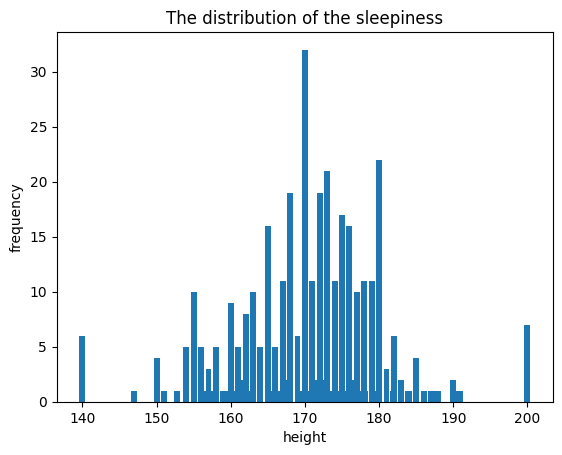

In [2026]:
sleepiness_values = train_df['height'].unique()

# 計算每個年齡值的出現次數 (即統計 `sleepiness` 欄位的頻率)
value_counts = train_df['height'].value_counts()

# 重新索引 `value_counts`，確保所有 `unique_values` 都包含在內，缺少的值填入 0
value_counts = value_counts.reindex(sleepiness_values, fill_value = 0)

# 使用 Matplotlib 繪製長條圖 (Bar Chart)
plt.bar(sleepiness_values, value_counts)
plt.xlabel('height')  # 設定 X 軸標籤 (年齡數值)
plt.ylabel('frequency')  # 設定 Y 軸標籤 (年齡出現的次數)
plt.title('The distribution of the sleepiness')
plt.show()

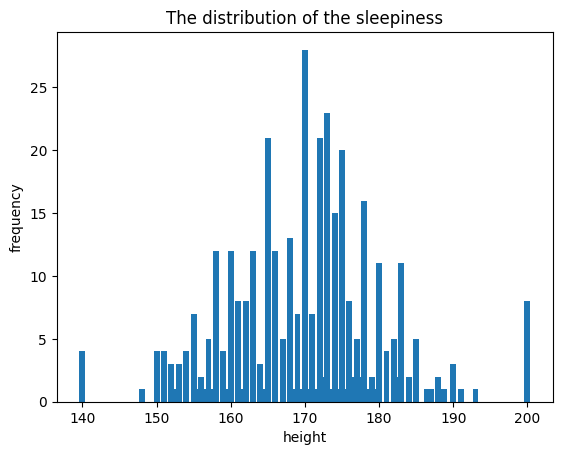

In [2027]:
sleepiness_values = test_df['height'].unique()

# 計算每個年齡值的出現次數 (即統計 `sleepiness` 欄位的頻率)
value_counts = test_df['height'].value_counts()

# 重新索引 `value_counts`，確保所有 `unique_values` 都包含在內，缺少的值填入 0
value_counts = value_counts.reindex(sleepiness_values, fill_value = 0)

# 使用 Matplotlib 繪製長條圖 (Bar Chart)
plt.bar(sleepiness_values, value_counts)
plt.xlabel('height')  # 設定 X 軸標籤 (年齡數值)
plt.ylabel('frequency')  # 設定 Y 軸標籤 (年齡出現的次數)
plt.title('The distribution of the sleepiness')
plt.show()

<Axes: >

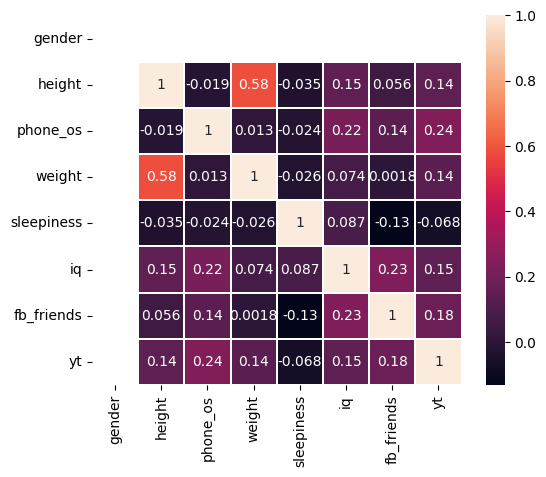

In [2028]:
sns.heatmap(test_df[['gender', 'height', 'phone_os', 'weight', 'sleepiness', 'iq', 'fb_friends', 'yt']].corr(),linewidths=0.1,vmax=1.0, square=True,linecolor='white', annot=True)

# **4. 編碼文字欄位(self_intro)**


In [ ]:
test_df['gender'] = np.nan

<h2>4.1 TF-IDF

In [ ]:
train_df['self_intro'] = self_train_backup.loc[train_df.index]
test_df['self_intro'] = self_test_backup.loc[test_df.index]

In [ ]:
train_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_fb_friends,is_outlier_yt,is_outlier_height,is_outlier_weight,is_outlier_iq,self_intro
0,2,1,154.0,43.0,3,151.109436,583.000000,0.00000,0,0,0,0,1,Beautiful
1,2,1,156.0,47.0,3,130.000000,444.364807,3.50000,1,0,0,0,0,Enjoying being who I'm notsss
2,1,0,170.0,61.0,3,90.000000,540.000000,2.45198,0,1,0,0,0,Practice Makes perfect
3,1,1,170.0,62.0,4,100.000000,362.907562,5.00000,1,0,0,0,0,Straightforward
4,2,0,158.0,67.0,4,128.000000,320.000000,1.20000,0,0,0,0,0,Humorous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1,0,166.0,66.0,4,90.000000,1000.000000,1.00000,0,0,0,0,0,I hope i am a super hero.
419,1,0,176.0,65.0,4,87.000000,1300.000000,2.00000,0,0,0,0,0,NaN
420,1,1,174.0,72.0,2,156.549637,2000.000000,9.00000,1,0,0,0,1,NaN
421,2,0,167.0,50.0,3,180.000000,483.000000,10.00000,0,0,0,0,0,NaN


In [ ]:
test_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_fb_friends,is_outlier_yt,is_outlier_height,is_outlier_weight,is_outlier_iq,self_intro
0,NaN,1,200.0,100.000000,1,87.000000,87.000000,87.000000,0,1,1,0,0,GOod
1,NaN,1,175.0,80.000000,3,183.305008,2000.000000,24.558914,1,1,0,0,1,Easygoing
2,NaN,1,155.0,45.000000,3,150.000000,872.796875,9.000000,1,0,0,0,0,NaN
3,NaN,1,173.0,85.000000,4,144.355423,1208.800903,15.000000,1,0,0,0,1,NaN
4,NaN,0,164.0,57.000000,4,130.000000,505.000000,2.000000,0,0,0,0,0,I'm smart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,NaN,1,160.0,70.000000,4,122.444763,500.000000,5.000000,0,0,0,0,1,I am a girl.
422,NaN,0,162.0,54.000000,3,180.000000,462.000000,5.000000,0,0,0,0,0,NaN
423,NaN,1,173.0,66.000000,5,135.000000,102.000000,11.100000,0,0,0,0,0,I like to play basketball.
424,NaN,1,165.0,53.000000,2,110.000000,507.000000,300.000000,0,1,0,0,0,Good


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. 補空字串
train_df['self_intro'] = train_df['self_intro'].fillna("")

# 2. 向量轉換
vectorizer = TfidfVectorizer(max_features=100)
X_tfidf = vectorizer.fit_transform(train_df['self_intro'])

# 3. 建立 DataFrame 並保留原 index
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=train_df.index
)

# 4. 合併
train_df = pd.concat([train_df.drop(columns=['self_intro']), tfidf_df], axis=1)


In [ ]:
train_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_fb_friends,is_outlier_yt,...,want,who,wise,with,without,work,world,xd,you,zzzz
0,2,1,154.0,43.0,3,151.109436,583.000000,0.00000,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,156.0,47.0,3,130.000000,444.364807,3.50000,1,0,...,0.0,0.527714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,170.0,61.0,3,90.000000,540.000000,2.45198,0,1,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,170.0,62.0,4,100.000000,362.907562,5.00000,1,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0,158.0,67.0,4,128.000000,320.000000,1.20000,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1,0,166.0,66.0,4,90.000000,1000.000000,1.00000,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
419,1,0,176.0,65.0,4,87.000000,1300.000000,2.00000,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420,1,1,174.0,72.0,2,156.549637,2000.000000,9.00000,1,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421,2,0,167.0,50.0,3,180.000000,483.000000,10.00000,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 1. 填補空值（防止 NaN 導致 TF-IDF 出錯）
test_df['self_intro'] = test_df['self_intro'].fillna("")

# 2. 套用已訓練好的 vectorizer（⚠️ 不能再用 fit_transform）
X_test_tfidf = vectorizer.transform(test_df['self_intro'])

# 3. 轉成 DataFrame（⚠️ index 要對齊）
tfidf_test_df = pd.DataFrame(
    X_test_tfidf.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=test_df.index
)

# 4. 合併進 test_df（移除原本的 self_intro）
test_df = pd.concat([test_df.drop(columns=['self_intro']), tfidf_test_df], axis=1)



In [ ]:
test_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_fb_friends,is_outlier_yt,...,want,who,wise,with,without,work,world,xd,you,zzzz
0,NaN,1,200.0,100.000000,1,87.000000,87.000000,87.000000,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,1,175.0,80.000000,3,183.305008,2000.000000,24.558914,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,1,155.0,45.000000,3,150.000000,872.796875,9.000000,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,1,173.0,85.000000,4,144.355423,1208.800903,15.000000,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,0,164.0,57.000000,4,130.000000,505.000000,2.000000,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,NaN,1,160.0,70.000000,4,122.444763,500.000000,5.000000,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
422,NaN,0,162.0,54.000000,3,180.000000,462.000000,5.000000,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
423,NaN,1,173.0,66.000000,5,135.000000,102.000000,11.100000,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424,NaN,1,165.0,53.000000,2,110.000000,507.000000,300.000000,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#  **5. 特徵選取**

In [ ]:
pip install featuretools

In [ ]:
import featuretools as ft
from xgboost import XGBClassifier

train_df['id'] = id_train_backup
test_df['id'] = id_test_backup
def generate_feature_matrix(df, drop_cols, feature_defs=None, is_train=True):
  df_ft = df.drop(columns=drop_cols)

  # 建立 EntitySet
  es = ft.EntitySet(id='data_set')
  es.add_dataframe(dataframe_name='users', dataframe=df_ft, index='id')

  if is_train:
      # 訓練資料，使用 dfs 產生特徵與定義
      feature_matrix, feature_defs_out = ft.dfs(
          entityset=es,
          target_dataframe_name='users',
          trans_primitives=[
              'add_numeric',
              'subtract_numeric',
              'multiply_numeric',
              'divide_numeric',
              'percentile',
              'absolute',
              'negate'
          ],
          max_depth=1
      )
  else:
      # 測試資料，使用訓練階段的特徵定義
      feature_matrix = ft.calculate_feature_matrix(
          entityset=es,
          features=feature_defs
      )
      feature_defs_out = None  # 測試階段不需要產出新的定義

  # 合併回原始資料
  df_combined = pd.merge(df, feature_matrix, on='id', how='left')

  return df_combined, feature_defs_out

In [ ]:
exclude_cols = ['gender', 'phone_os']

# 做特徵工程
train_df_combined, feature_defs = generate_feature_matrix(train_df, drop_cols=exclude_cols, is_train=True)
test_df_combined, _ = generate_feature_matrix(test_df, drop_cols=exclude_cols, feature_defs=feature_defs, is_train=False)
train_df_combined

,gender,phone_os,height_x,weight_x,sleepiness_x,iq_x,fb_friends_x,yt_x,is_outlier_fb_friends_x,is_outlier_yt_x,...,world - xd,world - you,world - yt,world - zzzz,xd - you,xd - yt,xd - zzzz,you - yt,you - zzzz,yt - zzzz
0,2,1,154.0,43.0,3,151.109436,583.000000,0.00000,0,0,...,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000
1,2,1,156.0,47.0,3,130.000000,444.364807,3.50000,1,0,...,0.0,0.0,-3.50000,0.0,0.0,-3.50000,0.0,-3.50000,0.0,3.50000
2,1,0,170.0,61.0,3,90.000000,540.000000,2.45198,0,1,...,0.0,0.0,-2.45198,0.0,0.0,-2.45198,0.0,-2.45198,0.0,2.45198
3,1,1,170.0,62.0,4,100.000000,362.907562,5.00000,1,0,...,0.0,0.0,-5.00000,0.0,0.0,-5.00000,0.0,-5.00000,0.0,5.00000
4,2,0,158.0,67.0,4,128.000000,320.000000,1.20000,0,0,...,0.0,0.0,-1.20000,0.0,0.0,-1.20000,0.0,-1.20000,0.0,1.20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1,0,166.0,66.0,4,90.000000,1000.000000,1.00000,0,0,...,0.0,0.0,-1.00000,0.0,0.0,-1.00000,0.0,-1.00000,0.0,1.00000
419,1,0,176.0,65.0,4,87.000000,1300.000000,2.00000,0,0,...,0.0,0.0,-2.00000,0.0,0.0,-2.00000,0.0,-2.00000,0.0,2.00000
420,1,1,174.0,72.0,2,156.549637,2000.000000,9.00000,1,0,...,0.0,0.0,-9.00000,0.0,0.0,-9.00000,0.0,-9.00000,0.0,9.00000
421,2,0,167.0,50.0,3,180.000000,483.000000,10.00000,0,0,...,0.0,0.0,-10.00000,0.0,0.0,-10.00000,0.0,-10.00000,0.0,10.00000


In [ ]:
# 目標欄位
target_col = 'gender'

# 特徵與標籤
X = train_df_combined.drop(columns=['id', 'gender'])
y = train_df_combined['gender'].map({1: 0, 2: 1})  # 不動原始欄位

# ✅ 清理 inf / NaN
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median(numeric_only=True))
X = X.clip(lower=-1e6, upper=1e6)  # 可選：限制極端值

# 建立模型
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X, y)


# 特徵重要性對應每個欄位
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# 排序（由高到低）
feature_importances = feature_importances.sort_values(ascending=False)

# 顯示前 20 名最重要的特徵
print("Top 10 重要特徵：")
print(feature_importances.head(10))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:33:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Top 10 重要特徵：
height + weight                   0.129169
height_x                          0.041980
brilliant + kindness              0.041930
is_outlier_weight / sleepiness    0.033613
brilliant + haha                  0.023789
height / is_outlier_weight        0.023428
yt / sleepiness                   0.022200
god + iq                          0.021870
iq / weight                       0.021085
iq * weight                       0.021049
dtype: float32


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24501 (\N{CJK UNIFIED IDEOGRAPH-5FB5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  fig.canvas

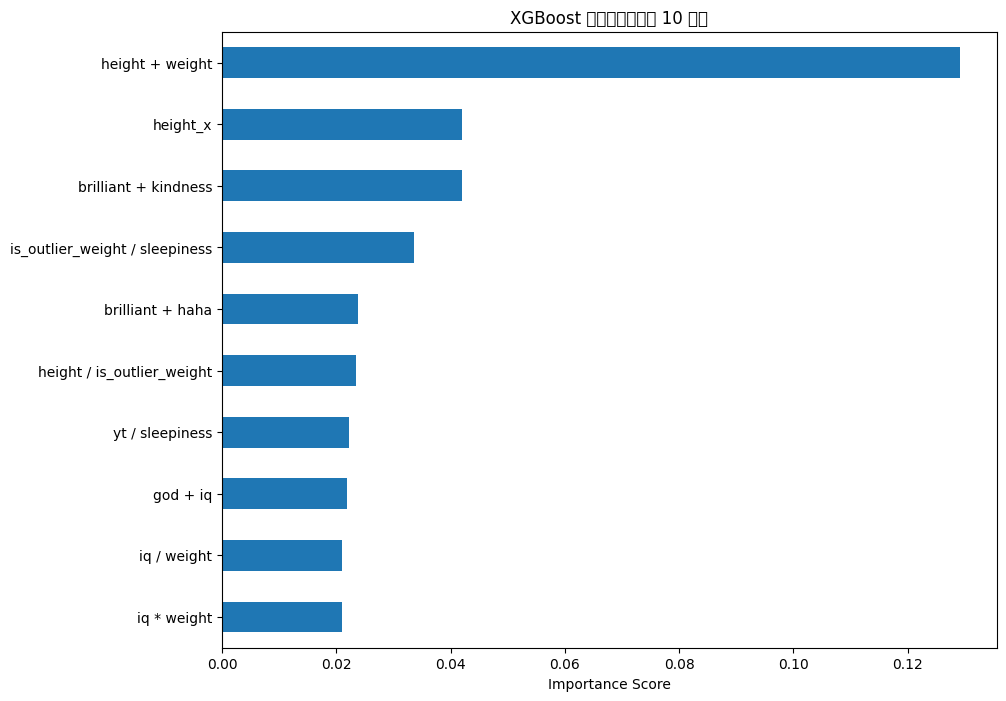

In [ ]:
import matplotlib.pyplot as plt

feature_importances.head(10).plot(kind='barh', figsize=(10, 8))
plt.title("XGBoost 特徵重要性（前 10 名）")
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.show()


In [ ]:
top_10_features = feature_importances.head(10).index.tolist()

# 將 top_10 特徵從 feature_matrix 擷取出來（包含 id 方便 merge）
train_top_features = train_df_combined[['id'] + top_10_features]
test_top_features = test_df_combined[['id'] + top_10_features]

# 加回到原始 train/test 資料表中
train_df = pd.merge(train_df, train_top_features, on='id', how='left')
test_df = pd.merge(test_df, test_top_features, on='id', how='left')
train_df.drop(columns=["id"], inplace=True)
test_df.drop(columns=["id"], inplace=True)

# **6.資料不平衡處理**


In [ ]:
print(train_df['gender'].value_counts(normalize=True))

gender
1    0.747045
2    0.252955
Name: proportion, dtype: float64


In [ ]:
pip install imbalanced-learn

# 6.1 SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# 定義 SMOTE 處理函數
def apply_smote(X, y, random_state=42):
    # 處理無窮大和 NaN
    X = X.replace([np.inf, -np.inf], np.nan)
    X = X.fillna(X.median(numeric_only=True))
    # 標籤轉為 0 和 1
    y_encoded = y - 1 # gender: 1/2 → 0/1
    # SMOTE 重抽樣
    smote = SMOTE(random_state=random_state)
    X_smote, y_smote = smote.fit_resample(X, y_encoded)
    print("SMOTE 後分佈：", Counter(y_smote))
    return X_smote, y_smote


# 特徵與標籤切分
X = train_df.drop(columns=['gender']).astype(float)
y = train_df['gender']
X_smote, y_smote = apply_smote(X, y, random_state=42)

SMOTE 後分佈： Counter({1: 316, 0: 316})


# 6.1SMOTENN

In [ ]:
from imblearn.combine import SMOTEENN
from collections import Counter

X = train_df.drop(columns=['gender']).astype(float)
y = train_df['gender']

# 初始化 SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# 重取樣
X_smote, y_smote = smote_enn.fit_resample(X, y)

# 查看前後類別分佈
print("原始分佈：", Counter(y))
print("SMOTEENN 後：", Counter(y_resampled))

# 6.1 SmoteTomek


# **7. 預測分類模型**


<h2> 7.1 XGBOOST

(討論)ValueError: Invalid classes inferred from unique values of y.  Expected: [0 1], got [1 2]

In [ ]:
# from xgboost import XGBClassifier
# #  建立模型
# xg_clf = XGBClassifier(
#     max_depth=5,
#     learning_rate=0.1,
#     n_estimators=100,
#     eval_metric='logloss',
#     random_state=42
# )

# # 模型訓練
# xg_clf.fit(X_smote, y_smote)

# # 預測：X_test 的準備記得也要和 train_df 的欄位一致
# X_test = test_df.drop(columns=['gender']).astype(float)

# # 預測結果：轉回原本的 1/2 標籤
# y_test_pred = xg_clf.predict(X_test) + 1


In [ ]:
print("Train 欄位缺失情況：")
print(train_df.isna().sum())

print("\nTest 欄位缺失情況：")
print(test_df.isna().sum())

Train 欄位缺失情況：
gender                        0
phone_os                      0
height                        0
weight                        0
sleepiness                    0
                             ..
height / is_outlier_weight    0
yt / sleepiness               0
god + iq                      0
iq / weight                   0
iq * weight                   0
Length: 123, dtype: int64

Test 欄位缺失情況：
gender                        426
phone_os                        0
height                          0
weight                          0
sleepiness                      0
                             ... 
height / is_outlier_weight      0
yt / sleepiness                 0
god + iq                        0
iq / weight                     0
iq * weight                     0
Length: 123, dtype: int64


<h2>7.2 Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 建立模型
rf_clf = RandomForestClassifier(
    n_estimators=200,      # 增加樹的數量以提升穩定性，RF 通常受益於更多樹
    max_depth=10,          # 稍微增加深度，RF 不易過擬合，可適當放寬
    min_samples_split=5,   # 控制每個節點分裂的最小樣本數，減少過擬合
    min_samples_leaf=2,    # 葉節點最小樣本數，提升模型泛化能力
    max_features='sqrt',   # 特徵子集選擇，RF 常用 sqrt 提升多樣性
    criterion='gini',      # 使用基尼係數，RF 中常見且計算效率高
    random_state=42,       # 保持隨機種子一致性
    n_jobs=-1              # 使用所有可用 CPU 核心加速訓練
)

# 模型訓練
rf_clf.fit(X_smote, y_smote)

# 預測：X_test 的準備記得也要和 train_df 的欄位一致
X_test = test_df.drop(columns=['gender']).astype(float)

# 處理異常值（參考 X_smote 而非 X_train）
for col in X_test.columns:
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')  # 轉為數值，無效值變 NaN
    # 使用 X_smote 的中位數填充（因為 X_smote 是訓練數據）
    X_test[col] = X_test[col].replace([np.inf, -np.inf], np.nan).fillna(X_smote[col].median())
    X_test[col] = X_test[col].clip(lower=-1e38, upper=1e38)  # 限制值範圍

# 預測結果：轉回原本的 1/2 標籤
y_test_pred = rf_clf.predict(X_test) + 1

In [ ]:
test_df['gender'] = y_test_pred

In [ ]:
test_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_fb_friends,is_outlier_yt,...,height + weight,height_x,brilliant + kindness,is_outlier_weight / sleepiness,brilliant + haha,height / is_outlier_weight,yt / sleepiness,god + iq,iq / weight,iq * weight
0,1,1,200.0,100.000000,1,87.000000,87.000000,87.000000,0,1,...,300.000000,200.0,0.0,0.00,0.0,inf,87.000000,87.000000,0.870000,8700.000000
1,1,1,175.0,80.000000,3,183.305008,2000.000000,24.558914,1,1,...,255.000000,175.0,0.0,0.00,0.0,inf,8.186305,183.305008,2.291313,14664.400635
2,2,1,155.0,45.000000,3,150.000000,872.796875,9.000000,1,0,...,200.000000,155.0,0.0,0.00,0.0,inf,3.000000,150.000000,3.333333,6750.000000
3,1,1,173.0,85.000000,4,144.355423,1208.800903,15.000000,1,0,...,258.000000,173.0,0.0,0.00,0.0,inf,3.750000,144.355423,1.698299,12270.210953
4,2,0,164.0,57.000000,4,130.000000,505.000000,2.000000,0,0,...,221.000000,164.0,0.0,0.00,0.0,inf,0.500000,130.000000,2.280702,7410.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,2,1,160.0,70.000000,4,122.444763,500.000000,5.000000,0,0,...,230.000000,160.0,0.0,0.00,0.0,inf,1.250000,122.444763,1.749211,8571.133423
422,2,0,162.0,54.000000,3,180.000000,462.000000,5.000000,0,0,...,216.000000,162.0,0.0,0.00,0.0,inf,1.666667,180.000000,3.333333,9720.000000
423,1,1,173.0,66.000000,5,135.000000,102.000000,11.100000,0,0,...,239.000000,173.0,0.0,0.00,0.0,inf,2.220000,135.000000,2.045455,8910.000000
424,2,1,165.0,53.000000,2,110.000000,507.000000,300.000000,0,1,...,218.000000,165.0,0.0,0.00,0.0,inf,150.000000,110.000000,2.075472,5830.000000


In [ ]:
gender_counts = test_df['gender'].value_counts(dropna=False)
gender_counts

,count
gender,
1,307
2,119


In [ ]:
test_df['gender'] = test_df['gender'].astype('int64')

In [ ]:
import datetime
today_str = (datetime.datetime.utcnow() + datetime.timedelta(hours=8)).strftime('%m%d')
filename = f'{today_str}_rf.csv'

submit_df = pd.DataFrame({
    "id": range(1, len(test_df)+1),
    "gender": test_df["gender"]
})

# 直接儲存到 Google 雲端硬碟的路徑
submit_df.to_csv(f'drive/My Drive/Colab Notebooks/datasets/{filename}', index=False)

print("檔案已成功儲存到 Google 雲端硬碟！")

檔案已成功儲存到 Google 雲端硬碟！


In [ ]:
# 定義數據清理函數
def clean_data(X, reference_df=None):
    """
    清理數據中的無窮大和 NaN 值。

    參數:
    - X: 要清理的數據
    - reference_df: 用於填充 NaN 的參考數據（可選）
    """
    X_clean = X.copy()
    for col in X_clean.columns:
        X_clean[col] = pd.to_numeric(X_clean[col], errors='coerce')  # 轉為數值，無效值變 NaN
        # 如果有參考數據，使用其中位數填充；否則用自身中位數
        fill_value = reference_df[col].median() if reference_df is not None else X_clean[col].median()
        X_clean[col] = X_clean[col].replace([np.inf, -np.inf], np.nan).fillna(fill_value)
        X_clean[col] = X_clean[col].clip(lower=-1e38, upper=1e38)  # 限制值範圍
    return X_clean

In [ ]:
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# 定義交叉驗證函數
def run_cross_validation(X, y, model, use_smote=True, cv=3, random_state=42):
    # 清理數據
    X_clean = clean_data(X)
    # 調整標籤為 0/1
    y_adjusted = y - 1

    # 根據 use_smote 選擇是否使用 Pipeline
    if use_smote:
        pipeline = Pipeline([
            ('smote', SMOTE(random_state=random_state)),
            ('classifier', model)
        ])
        estimator = pipeline
    else:
        estimator = model


    # 計算各評估指標
    metrics = {
        'accuracy': cross_val_score(estimator, X_clean, y_adjusted, cv=cv, scoring='accuracy'),
        'precision': cross_val_score(estimator, X_clean, y_adjusted, cv=cv, scoring='precision'),
        'recall': cross_val_score(estimator, X_clean, y_adjusted, cv=cv, scoring='recall'),
        'f1': cross_val_score(estimator, X_clean, y_adjusted, cv=cv, scoring='f1'),
        'roc_auc': cross_val_score(estimator, X_clean, y_adjusted, cv=cv, scoring='roc_auc')
    }

    # 輸出結果
    print(f"\n{model}\n五折交叉驗證評估指標（use_smote={use_smote}）：")
    for metric, scores in metrics.items():
        print(f"{metric}: 平均 = {np.mean(scores):.4f}, 每折 = {scores}")

    return metrics
# 測試 1: 使用 Pipeline(有對訓練集做smote)
metrics_smote = run_cross_validation(X, y, rf_clf, use_smote=False)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)
五折交叉驗證評估指標（use_smote=False）：
accuracy: 平均 = 0.8960, 每折 = [0.88652482 0.90780142 0.89361702]
precision: 平均 = 0.8485, 每折 = [0.8125     0.84848485 0.88461538]
recall: 平均 = 0.7190, 每折 = [0.72222222 0.77777778 0.65714286]
f1: 平均 = 0.7768, 每折 = [0.76470588 0.8115942  0.75409836]
roc_auc: 平均 = 0.9505, 每折 = [0.91719577 0.97222222 0.96199461]


In [ ]:
metrics_smote = run_cross_validation(X, y, xg_clf, use_smote=False)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)
五折交叉驗證評估指標（use_smote=False）：
accuracy: 平均 = 0.8842, 每折 = [0.88652482 0.90070922 0.86524823]
precision: 平均 = 0.8152, 每折 = [0.79411765 0.84375    0.80769231]
recall: 平均 = 0.7000, 每折 = [0.75 0.75 0.6 ]
f1: 平均 = 0.7514, 每折 = [0.77142857 0.79411765